# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
## Adding the essential libaries.
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [4]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
#TO-DO change the path to local path
train_data_dir      = '/content/drive/My Drive/Colab Notebooks/pictures/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/pictures/val'
test_data_dir       = '/content/drive/My Drive/Colab Notebooks/pictures/test'
target_size = (img_width, img_height)
epochs = 50
batch_size = 16
num_classes = 10

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
# Normalizing the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image generators to read the data from the directories
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                target_size=target_size)
valid_generator = valid_datagen.flow_from_directory(validation_data_dir, 
                                                target_size = target_size)
test_generator  = test_datagen.flow_from_directory(test_data_dir, 
                                                target_size = target_size)


# please print the number of samples in each folder 
print('Number of training samples : ' + str(train_generator.samples))
print('Number of validation samples : ' + str(valid_generator.samples))
print('Number of test samples : ' + str(test_generator.samples))

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Number of training samples : 4176
Number of validation samples : 1392
Number of test samples : 1392


In [5]:
#Prediction indices for the 10 categories
train_generator.class_indices

{'BIG': 0,
 'CHOOSE': 1,
 'COLD': 2,
 'FAMILY': 3,
 'HELLO': 4,
 'I': 5,
 'MIRROR': 6,
 'NEED': 7,
 'NICE': 8,
 'SMALL': 9}

## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [6]:
# build conv2D CNN model, be careful with softmax and output layers is 10
from keras.callbacks import EarlyStopping
# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (img_height, img_width, 3)
num_classes = 10

# define the Convolutional Neural Network
# Your Code HERE
model = Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Compiling the model and training including the files of compile and fit
#Your code 
optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Train the model with training and validation set
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=epochs,
                    batch_size=batch_size)


Epoch 1/50
131/131 [==============================] - 856s 6s/step - loss: 0.6941 - accuracy: 0.7742 - val_loss: 0.6668 - val_accuracy: 0.8233
Epoch 2/50
131/131 [==============================] - 26s 195ms/step - loss: 0.0495 - accuracy: 0.9864 - val_loss: 0.8062 - val_accuracy: 0.8721
Epoch 3/50
131/131 [==============================] - 26s 196ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.7671 - val_accuracy: 0.8707
Epoch 4/50
131/131 [==============================] - 26s 195ms/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.8399 - val_accuracy: 0.8635
Epoch 5/50
131/131 [==============================] - 25s 194ms/step - loss: 3.1942e-04 - accuracy: 1.0000 - val_loss: 0.8096 - val_accuracy: 0.8772
Epoch 6/50
131/131 [==============================] - 25s 194ms/step - loss: 4.4715e-05 - accuracy: 1.0000 - val_loss: 0.8324 - val_accuracy: 0.8786
Epoch 7/50
131/131 [==============================] - 25s 194ms/step - loss: 2.9761e-05 - accuracy: 1.0000 - val_loss: 0.851

%Test

Text(0.5, 0, 'Epochs')

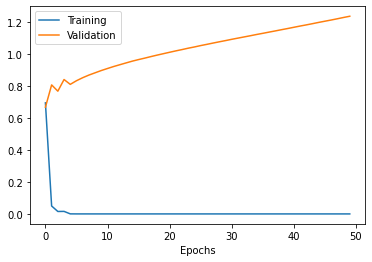

In [ ]:
#Plotting loss trend
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

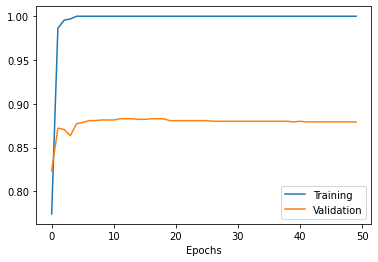

In [ ]:
# Plotting accuracy trend
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score = model.evaluate(test_generator)
print('Loss on test dataset is ' + str(score[0]))
print('Accuracy on test dataset is ' + str(score[1]))


44/44 [==============================] - 282s 7s/step - loss: 1.7595 - accuracy: 0.8312
1.7595292329788208
0.8311781883239746


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

# Your code HERE
#Adding L1 regularization to the existing model
from keras.regularizers import l1

l1_model = Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

l1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
l1_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Train the model with training and validation set
l1_history = l1_model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/50
131/131 [==============================] - 26s 193ms/step - loss: 4.8491 - accuracy: 0.7790 - val_loss: 1.0623 - val_accuracy: 0.8326
Epoch 2/50
131/131 [==============================] - 25s 191ms/step - loss: 0.3802 - accuracy: 0.9878 - val_loss: 0.7495 - val_accuracy: 0.8750
Epoch 3/50
131/131 [==============================] - 26s 196ms/step - loss: 0.2356 - accuracy: 0.9990 - val_loss: 0.6616 - val_accuracy: 0.8951
Epoch 4/50
131/131 [==============================] - 26s 196ms/step - loss: 0.1847 - accuracy: 1.0000 - val_loss: 0.6338 - val_accuracy: 0.8815
Epoch 5/50
131/131 [==============================] - 25s 191ms/step - loss: 0.1604 - accuracy: 1.0000 - val_loss: 0.6227 - val_accuracy: 0.8966
Epoch 6/50
131/131 [==============================] - 25s 191ms/step - loss: 0.1429 - accuracy: 1.0000 - val_loss: 0.6025 - val_accuracy: 0.9023
Epoch 7/50
131/131 [==============================] - 25s 192ms/step - loss: 0.1315 - accuracy: 1.0000 - val_loss: 0.5873 - val_ac

Text(0.5, 0, 'Epochs')

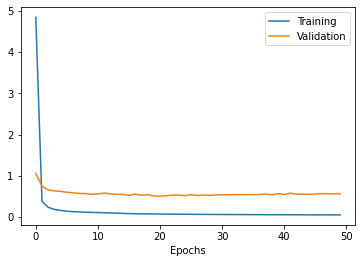

In [ ]:
#Plotting loss trend
plt.plot(l1_history.history['loss'])
plt.plot(l1_history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

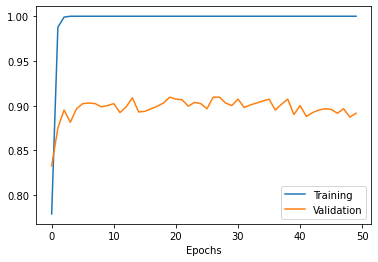

In [ ]:
#Plotting accuracy trend
plt.plot(l1_history.history['accuracy'])
plt.plot(l1_history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

In [ ]:
#Testing model on test data set
l1_score = l1_model.evaluate(test_generator)
print('Loss on test dataset is ' + str(l1_score[0]))
print('Accuracy on test dataset is ' + str(l1_score[1]))

44/44 [==============================] - 6s 139ms/step - loss: 0.6494 - accuracy: 0.8750
0.6493569612503052
0.875


## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE
from keras.regularizers import l2

#Adding L2 regularization to the existing model
l2_model = Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

l2_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
l2_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Train the model with training and validation set
l2_history = l2_model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/50
131/131 [==============================] - 27s 197ms/step - loss: 0.8590 - accuracy: 0.8194 - val_loss: 0.9708 - val_accuracy: 0.8154
Epoch 2/50
131/131 [==============================] - 26s 197ms/step - loss: 0.1273 - accuracy: 0.9976 - val_loss: 1.0174 - val_accuracy: 0.8355
Epoch 3/50
131/131 [==============================] - 27s 205ms/step - loss: 0.0723 - accuracy: 1.0000 - val_loss: 0.8694 - val_accuracy: 0.8441
Epoch 4/50
131/131 [==============================] - 26s 195ms/step - loss: 0.0510 - accuracy: 1.0000 - val_loss: 0.8748 - val_accuracy: 0.8463
Epoch 5/50
131/131 [==============================] - 25s 194ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.8622 - val_accuracy: 0.8585
Epoch 6/50
131/131 [==============================] - 25s 194ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.8084 - val_accuracy: 0.8520
Epoch 7/50
131/131 [==============================] - 26s 197ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.8106 - val_ac

Text(0.5, 0, 'Epochs')

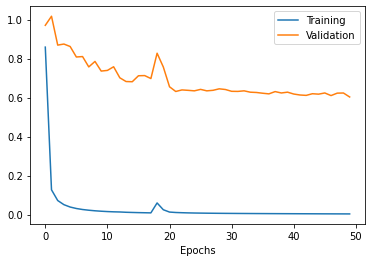

In [ ]:
#Plot loss trend
plt.plot(l2_history.history['loss'])
plt.plot(l2_history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

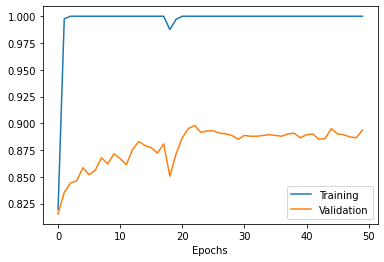

In [ ]:
#Plot accuracy trend
plt.plot(l2_history.history['accuracy'])
plt.plot(l2_history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')

In [ ]:
# Testing on the test data set
l2_score = l2_model.evaluate(test_generator)
print('Loss on test dataset is ' + str(l2_score[0]))
print('Accuracy on test dataset is ' + str(l2_score[1]))

44/44 [==============================] - 6s 139ms/step - loss: 0.7046 - accuracy: 0.8843
0.7045925855636597
0.8843390941619873


## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

Freezing layers from 0 to 30
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 10)                1003530   
                                                                 
Total params: 24,591,242
Trainable params: 24,365,642
Non-trainable params: 225,600
_________________________________________________________________
None
Epoch 1/50
131/131 [==============================] - 102s 669ms/step - loss: 3.6738 - accuracy: 0.1025 - val_loss: 2.3548 - val_accuracy: 0.1034
Epoch 2/50
131/131 [==============================] - 89s 682ms/step - loss: 1.7023 - accuracy: 0.3549 - val_loss: 2.092

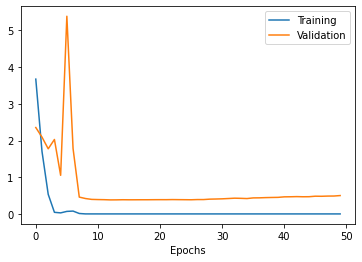

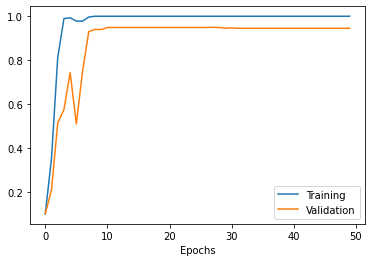

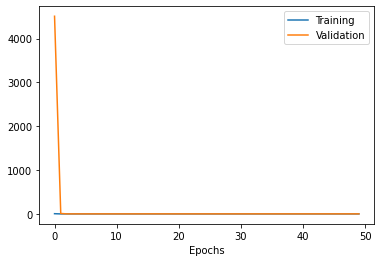

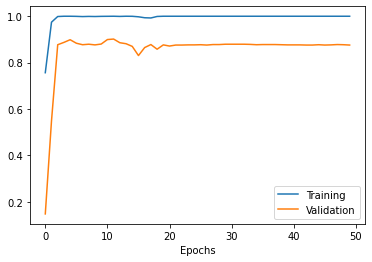

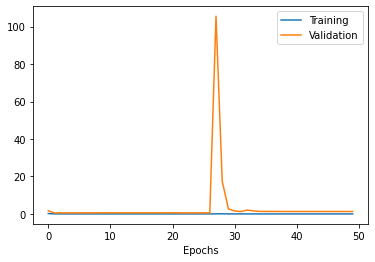

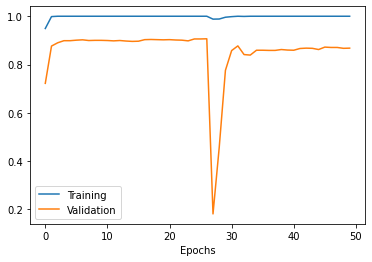

In [10]:
# define the freeze layers 
# your Code HERE
from keras.applications.resnet import ResNet50

# Fine-tune the model to fit our project  
# your Code HERE

# Pretrained Resnet50 model
base_model = ResNet50(include_top = False, weights='imagenet')
optimizer = keras.optimizers.Adam()
trained_models = []
#Building a model by freezing selected layers in the pretrained model and adding a fully connected layer to fit the given dataset 
def build_model(start, end, base_model, input_shape, num_classes):
  print("Freezing layers from {} to {}".format(start, end))
  for layer in base_model.layers[start:end]:
    layer.trainable = False
  resnet = Sequential([keras.Input(shape = input_shape),
                        base_model,
                        layers.Flatten(),
                        layers.Dense(num_classes, activation='softmax')])
  print(resnet.summary())
  return resnet

#Training the model using images from the training dataset and validation dataset
def train_model(resnet_model, optimizer, train_generator, valid_generator, batch_size, epochs):
  resnet_model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
  resnet_history = resnet_model.fit(
    x=train_generator,
    validation_data=valid_generator,
    batch_size=batch_size,
    epochs=epochs)
  trained_models.append(resnet_history)
  return resnet_history

#Plotting accuracy and loss trends of the training process
def plot_trends(history, metric1, metric2):
  plt.plot(history.history[metric1])
  plt.plot(history.history[metric2])
  plt.legend(['Training', 'Validation'])
  plt.xlabel('Epochs')
  plt.show()

#Evaluating the built model on the test dataset
def evaluate(model, generator):
  score = model.evaluate(generator)
  print('Loss on test dataset is ' + str(score[0]))
  print('Accuracy on test dataset is ' + str(score[1]))
  print('*'*40)

#Defining the freeze layers and calling the above function to train and predict different models
config = [(0, 30), (30, 60), (60, 90)]
for i in config:
    start = i[0]
    end = i[1]
    model = build_model(start, end, base_model, input_shape, num_classes)
    history = train_model(model, optimizer, train_generator, valid_generator, batch_size, epochs)
    evaluate(model, test_generator)

for i in trained_models:
    plot_trends(i, 'loss', 'val_loss')
    plot_trends(i, 'accuracy', 'val_accuracy')

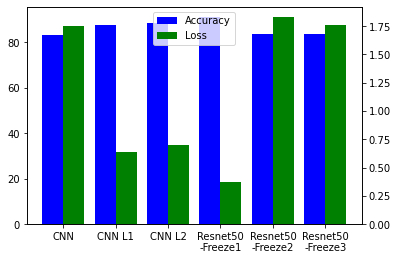

In [25]:
scores = [[83.11, 87.5, 88.4, 91, 83.4, 83.4],[1.75, 0.64, 0.70, 0.37, 1.83, 1.76]]
mods = ['CNN', 'CNN L1', 'CNN L2', 'Resnet50\n-Freeze1', 'Resnet50\n-Freeze2', 'Resnet50\n-Freeze3']
x_axis = np.arange(len(mods))
ax1 = plt.subplot(1,1,1)
plt.xticks(x_axis, mods)
acc =ax1.bar(x_axis - 0.2, scores[0], color = 'b', width = 0.4, label = 'Test Accuracy')
ax2 = ax1.twinx()
loss =ax2.bar(x_axis + 0.2, scores[1], color = 'g', width = 0.4, label = 'Test Loss')
plt.legend([acc, loss],['Accuracy', 'Loss'])
plt.show()